In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# remove pandas column count limit
pd.set_option('display.max_columns', None)

In [3]:
# Select the features for correlation matrix
selected_features = ['id','deviceid','trip_id','speed','acceleration','radial_acceleration','distance_from_start','acceleration_der','bus_stop']
data = pd.read_csv('../DataOut/bus_trip_all_points_with_acceleration_and_radial_acceleration_and_distance_and_accDiff.csv')
data

,id,deviceid,devicetime,latitude,longitude,speed,date,time,geometry,bus_stop,trip_id,direction,count,acceleration,radial_acceleration,distance_from_start,time_diff,acc_diff,acceleration_der
0,574733099,116,2021-10-16 08:03:19,7.293068,80.636430,14.03890,2021-10-16,08:03:19,POINT (184841.00784031872 232320.15459256113),NaN,2.0,1,207,0.323975,0.000000,0.000000,NaN,NaN,0.000000
1,574733100,116,2021-10-16 08:03:34,7.293043,80.637552,10.25920,2021-10-16,08:03:34,POINT (184964.84865244984 232317.35306792473),NaN,2.0,1,207,-0.251980,1.278067,123.738485,0 days 00:00:15,-0.575955,-0.038397
2,574733101,116,2021-10-16 08:03:49,7.292725,80.637707,7.55940,2021-10-16,08:03:49,POINT (184981.95255171193 232282.14959255166),NaN,2.0,1,207,-0.179987,0.722300,163.044397,0 days 00:00:15,0.071993,0.004800
3,574733102,116,2021-10-16 08:04:04,7.292292,80.637663,3.77970,2021-10-16,08:04:04,POINT (184977.15733984314 232234.22458233108),NaN,2.0,1,207,-0.251980,0.048332,211.472339,0 days 00:00:15,-0.071993,-0.004800
4,574736662,116,2021-10-16 08:04:19,7.291640,80.637455,9.17927,2021-10-16,08:04:19,POINT (184954.1363920236 232162.16484193364),101,2.0,1,207,0.359971,1.052222,287.492821,0 days 00:00:15,0.611951,0.040797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159802,1310926397,262,2022-08-09 10:55:05,7.290370,80.638812,20.51840,2022-08-09,10:55:05,POINT (185103.88471817068 232021.69189563429),NaN,5586.0,2,226,-0.539900,4.312238,16062.472333,0 days 00:00:01,-0.694171,-0.694171
1159803,1310926396,262,2022-08-09 10:55:37,7.291380,80.637410,7.55940,2022-08-09,10:55:37,POINT (184949.15914480377 232133.4259444512),NaN,5586.0,2,226,-0.404969,0.096588,16253.551165,0 days 00:00:32,0.134931,0.004217
1159804,1310926395,262,2022-08-09 10:55:38,7.291392,80.637387,7.55940,2022-08-09,10:55:38,POINT (184946.57580228115 232134.70946937904),NaN,5586.0,2,226,0.000000,0.588683,16256.436454,0 days 00:00:01,0.404969,0.404969
1159805,1310926393,262,2022-08-09 10:55:53,7.291295,80.636463,12.95900,2022-08-09,10:55:53,POINT (184844.62591334787 232124.05764201845),NaN,5586.0,2,226,0.359973,0.563965,16358.837456,0 days 00:00:15,0.359973,0.023998


In [4]:
# drop rows where bus_stop is Nan
data = data.dropna(subset=['bus_stop'])
data

,id,deviceid,devicetime,latitude,longitude,speed,date,time,geometry,bus_stop,trip_id,direction,count,acceleration,radial_acceleration,distance_from_start,time_diff,acc_diff,acceleration_der
4,574736662,116,2021-10-16 08:04:19,7.291640,80.637455,9.179270,2021-10-16,08:04:19,POINT (184954.1363920236 232162.16484193364),101,2.0,1,207,0.359971,1.052222,287.492821,0 days 00:00:15,0.611951,0.040797
5,574736663,116,2021-10-16 08:04:34,7.291210,80.637713,8.639310,2021-10-16,08:04:34,POINT (184982.64260533327 232114.61697960715),101,2.0,1,207,-0.035997,0.639311,343.141212,0 days 00:00:15,-0.395969,-0.026398
6,574736664,116,2021-10-16 08:04:49,7.290943,80.638160,0.000000,2021-10-16,08:04:49,POINT (185031.9565310351 232085.11003064158),101,2.0,1,207,-0.575954,0.000000,400.646939,0 days 00:00:15,-0.539957,-0.035997
7,574736665,116,2021-10-16 08:05:04,7.290943,80.638157,0.000000,2021-10-16,08:05:04,POINT (185031.58111776915 232085.11014168937),101,2.0,1,207,0.000000,0.000000,401.021945,0 days 00:00:15,0.575954,0.038397
8,574736666,116,2021-10-16 08:05:19,7.290943,80.638157,0.000000,2021-10-16,08:05:19,POINT (185031.58111776915 232085.11014168937),101,2.0,1,207,0.000000,0.000000,401.021945,0 days 00:00:15,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159790,1310927553,262,2022-08-09 10:52:14,7.287408,80.647895,5.939530,2022-08-09,10:52:14,POINT (186106.74566987337 231693.89494944707),212,5586.0,2,226,0.539960,0.679398,14874.049971,0 days 00:00:01,0.593956,0.593956
1159791,1310927252,262,2022-08-09 10:52:46,7.286982,80.647140,0.539957,2022-08-09,10:52:46,POINT (186023.3571638426 231646.73237348895),212,5586.0,2,226,-0.168737,0.005613,14969.902014,0 days 00:00:32,-0.708697,-0.022147
1159792,1310927251,262,2022-08-09 10:52:50,7.287078,80.647045,3.239740,2022-08-09,10:52:50,POINT (186012.88157963566 231657.42857972166),212,5586.0,2,226,0.674946,0.250199,14984.907978,0 days 00:00:04,0.843682,0.210921
1159793,1310927250,262,2022-08-09 10:52:51,7.287128,80.647017,4.319660,2022-08-09,10:52:51,POINT (186009.7472751272 231662.95856395428),212,5586.0,2,226,1.079920,0.124700,14991.289427,0 days 00:00:01,0.404974,0.404974


In [6]:
data_tid4 = data[data['trip_id'] == 4]
data_tid4.reset_index(drop=True, inplace=True)
data_tid4

,id,deviceid,devicetime,latitude,longitude,speed,date,time,geometry,bus_stop,trip_id,direction,count,acceleration,radial_acceleration,distance_from_start,time_diff,acc_diff,acceleration_der
0,575010342,116,2021-10-16 12:22:45,7.291677,80.637503,7.01944,2021-10-16,12:22:45,POINT (184959.47066711355 232166.2216316757),101,4.0,1,238,0.467963,0.436663,371.021626,0 days 00:00:15,0.755940,0.050396
1,575010343,116,2021-10-16 12:23:00,7.291208,80.637647,8.09935,2021-10-16,12:23:00,POINT (184975.27782874866 232114.43117584923),101,4.0,1,238,0.071994,0.872557,425.440043,0 days 00:00:15,-0.395969,-0.026398
2,575010344,116,2021-10-16 12:23:15,7.290953,80.638140,0.00000,2021-10-16,12:23:15,POINT (185029.74854484815 232086.21650821506),101,4.0,1,238,-0.539957,0.000000,486.803889,0 days 00:00:15,-0.611951,-0.040797
3,575010345,116,2021-10-16 12:23:30,7.290950,80.638137,0.00000,2021-10-16,12:23:30,POINT (185029.37302362506 232085.8516972573),101,4.0,1,238,0.000000,0.000000,487.328557,0 days 00:00:15,0.539957,0.035997
4,575010346,116,2021-10-16 12:23:45,7.290933,80.638153,0.00000,2021-10-16,12:23:45,POINT (185031.21641895035 232084.00442516507),101,4.0,1,238,0.000000,0.000000,489.944093,0 days 00:00:15,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,575061194,116,2021-10-16 13:11:30,7.284015,80.722047,0.00000,2021-10-16,13:11:30,POINT (194294.25499416696 231317.07325226706),113,4.0,1,238,-1.043920,0.000000,13192.773046,0 days 00:00:15,-0.575960,-0.038397
69,575061196,116,2021-10-16 13:11:45,7.284455,80.722218,14.57880,2021-10-16,13:11:45,POINT (194313.2189421158 231365.73837465595),113,4.0,1,238,0.971920,0.555855,13245.246562,0 days 00:00:15,2.015840,0.134389
70,575064851,116,2021-10-16 13:13:30,7.291068,80.721158,0.00000,2021-10-16,13:13:30,POINT (194196.2587656061 232097.06435952493),114,4.0,1,238,-1.187907,0.000000,14019.020610,0 days 00:00:15,-1.187907,-0.079194
71,575064928,116,2021-10-16 13:13:45,7.291503,80.721283,9.17927,2021-10-16,13:13:45,POINT (194210.0660617494 232145.16606502407),114,4.0,1,238,0.611951,0.241888,14069.316907,0 days 00:00:15,1.799858,0.119991


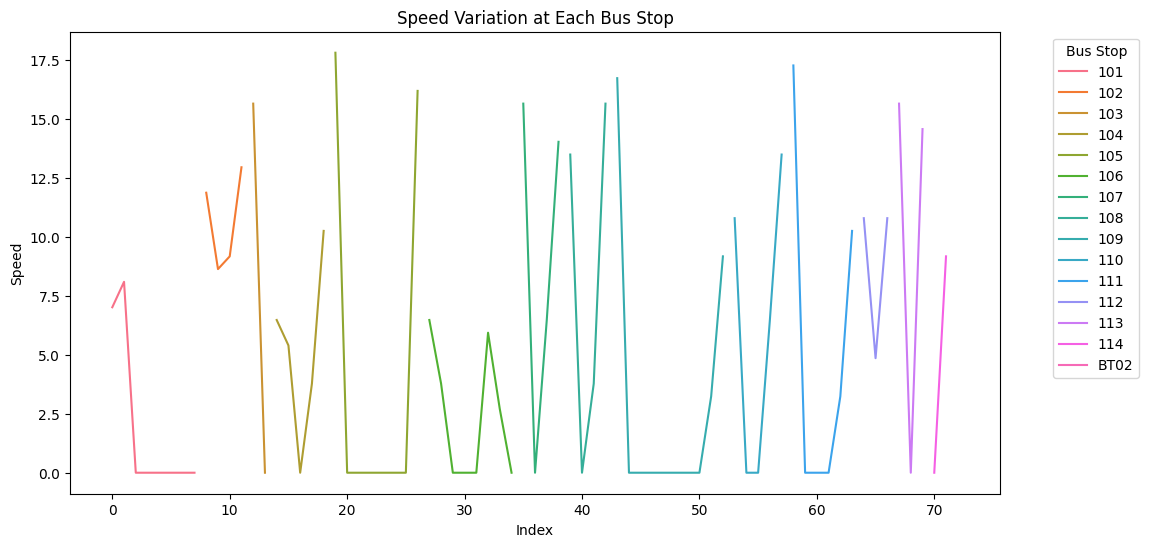

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a line plot using seaborn with hue based on 'segment'
plt.figure(figsize=(12, 6))
sns.lineplot(data=data_tid4, x=data_tid4.index, y='speed', hue='bus_stop', legend='full')

# Set plot labels and title
plt.xlabel('Index')
plt.ylabel('Speed')
plt.title('Speed Variation at Each Bus Stop')

# Show the legend
plt.legend(title='Bus Stop', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()
